# CSIT 553 Exploratory Data Analysis and Visualization
# Map & Aggregation Visualization Presentation

# BY

# Priyanka Alugolu
# Siva Chandra Kakarlapudi
# Sumanth Varma Dandu


In [237]:
# Importing Pandas and NumPy libraries
import pandas as pd
import numpy as np

# Print the version of Pandas and NumPy being used
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Pandas version: 2.0.1
NumPy version: 1.24.3


# Source Data
The data is being taken from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University

https://github.com/CSSEGISandData/COVID-19

In [238]:
# Load COVID-19 confirmed cases data from a CSV file into a Pandas DataFrame
confirmed_df = pd.read_csv('time_series_covid19_confirmed_US.csv')
# Drop unnecessary columns from the DataFrame
confirmed_df = confirmed_df.drop(['UID','iso2','iso3','code3','FIPS'], axis=1)
# Print the first few rows of the resulting DataFrame to check that it was loaded and processed correctly
confirmed_df.head()

,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,...,4/22/22,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22
0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,...,15762,15762,15762,15814,15818,15821,15826,15827,15827,15827
1,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,...,55591,55591,55591,55607,55617,55623,55633,55643,55643,55643
2,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,...,5660,5660,5660,5661,5664,5664,5665,5668,5668,5668
3,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,...,6430,6430,6430,6435,6437,6438,6439,6442,6442,6442
4,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,...,14967,14967,14967,14967,14968,14976,14977,14980,14980,14980


In [239]:
# Convert column names to datetime format and extract year as a string

date_columns = [pd.to_datetime(col).strftime("%Y") for col in confirmed_df.columns[6:]]
# Update DataFrame column names with the year strings

confirmed_df.columns = [col for col in confirmed_df.columns[:6]] + date_columns
# Group the DataFrame by all columns and sum the values
confirmed_us_cases = confirmed_df.groupby(confirmed_df.columns, axis=1).sum()

'''
Rename Columns to Logical Names
'''
# Rename specific columns to more descriptive names
confirmed_us_cases.rename(columns={'Country_Region': "Country"}, inplace=True)
confirmed_us_cases.rename(columns={'Province_State': "State"}, inplace=True)
confirmed_us_cases.rename(columns={'Long_': "Long"}, inplace=True)
confirmed_us_cases.rename(columns={'Admin2': "County"}, inplace=True)
confirmed_us_cases.rename(columns={'2020': "cases_2020"}, inplace=True)
confirmed_us_cases.rename(columns={'2021': "cases_2021"}, inplace=True)
confirmed_us_cases.rename(columns={'2022': "cases_2022"}, inplace=True)

# Select a subset of columns to keep in the DataFrame
confirmed_us_cases = confirmed_us_cases[['Country','State','County','Lat','Long','cases_2020','cases_2021','cases_2022']]

# Print the first few rows of the resulting DataFrame where the State is 'New Jersey'
confirmed_us_cases[confirmed_us_cases['State'] == 'New Jersey'].head()

,Country,State,County,Lat,Long,cases_2020,cases_2021,cases_2022
1844,US,New Jersey,Atlantic,39.475387,-74.658485,1252415,11740890,7976760
1845,US,New Jersey,Bergen,40.960109,-74.071643,6516390,37307515,25992930
1846,US,New Jersey,Burlington,39.876811,-74.669278,2073589,16593992,11860252
1847,US,New Jersey,Camden,39.803438,-74.963888,2895012,20671776,14611541
1848,US,New Jersey,Cape May,39.150088,-74.801702,387250,3574175,2561737


In [240]:
# Extract the year from date columns and format as YYYY
date_columns = [pd.to_datetime(col).strftime("%Y") for col in confirmed_df.columns[6:]]

# Rename the columns of confirmed_df to include the extracted year
confirmed_df.columns = [col for col in confirmed_df.columns[:6]] + date_columns

# Sum the values across columns to get total confirmed cases for each location
confirmed_us_cases = confirmed_df.groupby(confirmed_df.columns, axis=1).sum()

'''
Rename Columns to Logical Names
'''
# Rename the columns to more logical names
confirmed_us_cases.rename(columns={'Country_Region': "Country"}, inplace=True)
confirmed_us_cases.rename(columns={'Province_State': "State"}, inplace=True)
confirmed_us_cases.rename(columns={'Long_': "Long"}, inplace=True)
confirmed_us_cases.rename(columns={'Admin2': "County"}, inplace=True)
confirmed_us_cases.rename(columns={'2020': "cases_2020"}, inplace=True)
confirmed_us_cases.rename(columns={'2021': "cases_2021"}, inplace=True)
confirmed_us_cases.rename(columns={'2022': "cases_2022"}, inplace=True)

# Read the US states data from a CSV file
states_df = pd.read_csv('us-states.csv')

# Remove leading and trailing whitespace from state names and abbreviations
states_df['Name'] = states_df['Name'].str.strip()
states_df['Abbreviation'] = states_df['Abbreviation'].str.strip()

# Join confirmed_us_cases with states_df based on state name to include State Id
confirmed_us_cases = pd.merge(confirmed_us_cases, states_df, left_on='State', right_on='Name')

# Rename the 'Abbreviation' column to 'state_id'
confirmed_us_cases.rename(columns={'Abbreviation': "state_id"}, inplace=True)

# Select the desired columns for the final output
confirmed_us_cases = confirmed_us_cases[['Country', 'State', 'state_id', 'County', 'Lat', 'Long', 'cases_2020', 'cases_2021', 'cases_2022']]

# Display the first few rows of the resulting DataFrame
confirmed_us_cases.head()


,Country,State,state_id,County,Lat,Long,cases_2020,cases_2021,cases_2022
0,US,Alabama,AL,Autauga,32.539527,-86.644082,371932,2871865,1788169
1,US,Alabama,AL,Baldwin,30.727750,-87.722071,1131152,9750561,6389218
2,US,Alabama,AL,Barbour,31.868263,-85.387129,175724,983751,639336
3,US,Alabama,AL,Bibb,32.996421,-87.125115,148855,1144503,738167
4,US,Alabama,AL,Blount,33.982109,-86.567906,353620,2851434,1719781


In [241]:
# Extract the year from date columns and format as YYYY
date_columns = [pd.to_datetime(col).strftime("%Y") for col in confirmed_df.columns[6:]]

# Rename the columns of confirmed_df to include the extracted year
confirmed_df.columns = [col for col in confirmed_df.columns[:6]] + date_columns


# Group the DataFrame by columns to sum the values across each location
confirmed_us_cases = confirmed_df.groupby(confirmed_df.columns, axis=1).sum()

'''
Rename Columns to Logical Names
'''
confirmed_us_cases.rename(columns={'Country_Region': "Country"}, inplace=True)
confirmed_us_cases.rename(columns={'Province_State': "State"}, inplace=True)
confirmed_us_cases.rename(columns={'Long_': "Long"}, inplace=True)
confirmed_us_cases.rename(columns={'Admin2': "County"}, inplace=True)
confirmed_us_cases.rename(columns={'2020': "cases_2020"}, inplace=True)
confirmed_us_cases.rename(columns={'2021': "cases_2021"}, inplace=True)
confirmed_us_cases.rename(columns={'2022': "cases_2022"}, inplace=True)

# Read the US states data from a CSV file
states_df = pd.read_csv('us-states.csv')

# Remove leading and trailing whitespace from state names and abbreviations
states_df['Name'] = states_df['Name'].str.strip()

# Join confirmed_us_cases with states_df based on state name to include State Id
states_df['Abbreviation'] = states_df['Abbreviation'].str.strip()

#joing on State name to include State Id
confirmed_us_cases=pd.merge(confirmed_us_cases,states_df,left_on='State',right_on='Name')

# Rename the 'Abbreviation' column to 'state_id'
confirmed_us_cases.rename(columns={'Abbreviation': "state_id"}, inplace=True)
# Select the desired columns for the final output
confirmed_us_cases = confirmed_us_cases[['Country','State','state_id','County','Lat','Long','cases_2020','cases_2021','cases_2022']]
# Display the first few rows of the resulting DataFrame
confirmed_us_cases.head()


,Country,State,state_id,County,Lat,Long,cases_2020,cases_2021,cases_2022
0,US,Alabama,AL,Autauga,32.539527,-86.644082,371932,2871865,1788169
1,US,Alabama,AL,Baldwin,30.727750,-87.722071,1131152,9750561,6389218
2,US,Alabama,AL,Barbour,31.868263,-85.387129,175724,983751,639336
3,US,Alabama,AL,Bibb,32.996421,-87.125115,148855,1144503,738167
4,US,Alabama,AL,Blount,33.982109,-86.567906,353620,2851434,1719781


# Map Visualization

### Overview to Folium
* Folium is a powerful Python library that helps you create several types of Leaflet map. 
* From the official Folium documentation page:


In [242]:
import folium
from folium import plugins
# Creating US Map Using Folium

In [243]:
# create the map of US
us_map = folium.Map(location=[38, -102], zoom_start=4)
us_map

In [244]:
state_geo = "us-states.json"

In [245]:
#Selecting the 'state_id', 'cases_2020', 'cases_2021' and 'cases_2022' columns from the confirmed_us_cases dataframe
state_cases = confirmed_us_cases[['state_id','cases_2020','cases_2021','cases_2022']]

#Grouping the state_cases dataframe by 'state_id' column and summing up the values for 'cases_2020', 'cases_2021', and 'cases_2022' 
state_agg = state_cases.groupby('state_id').sum()
#Resetting the index so that the state_id column becomes a regular column instead of the index
state_agg = state_agg.reset_index()
#Displaying the first few rows of the state_agg dataframe
state_agg.head()


,state_id,cases_2020,cases_2021,cases_2022
0,AK,2875733,32190676,27471472
1,AL,32296555,227778353,148170466
2,AR,18399133,144787447,95061984
3,AS,0,573,202785
4,AZ,47071365,350377313,228554796


## Choropleth Maps

Choropleth can be easily created by binding the data between Pandas DataFrames/Series and Geo/TopoJSON geometries. Color Brewer sequential color schemes are built-in to the library, and can be passed to quickly visualize different combinations.

To create a `Choropleth` map, we will use the _choropleth_ method with the following main parameters:

1.  geo_data, which is the GeoJSON file.
2.  data, which is the dataframe containing the data.
3.  columns, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **id** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.


In [246]:
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_agg,
    columns=["state_id", "cases_2020"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Confirmed Covid Cases 2020",
).add_to(us_map)

folium.LayerControl().add_to(us_map)

us_map

## Choropleth Maps Using Ploty Express Library.

Choropleth can be easily created by binding the data between Pandas DataFrames/Series and Geo/TopoJSON geometries. Color Brewer sequential color schemes are built-in to the library, and can be passed to quickly visualize different combinations.

In [247]:
import plotly.graph_objects as go
import plotly.express as px
fig = px.choropleth(state_agg, 
                    geojson=state_geo, 
                    locations='state_id',
                    locationmode="USA-states", 
                    color='cases_2020',
                    color_continuous_scale="Turbo",
                    range_color=(0, 100000000),
                    scope="usa"
                    #labels={'2020':'Confirmed Cases'}
       )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### Bubble Map with Plotly Express

Scatter plot with the parameter:

* **size (str or int or Series or array-like)** – Either a name of a column in data_frame, or a pandas Series or array_like object. Values from this column or array_like are used to assign mark sizes.

In [248]:
#Data Loading from CSV dataset file.
global_df = pd.read_csv('covid19_confirmed_global.csv')

global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,3/15/22,3/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,175000,175353,175525,175893,175974,176039,176201,176409,176571,176743
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,272250,272337,272412,272479,272552,272621,272663,272689,272711,272804
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265297,265323,265346,265366,265391,265410,265432,265457,265478,265496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,38620,38710,38794,38794,38794,38794,38794,38794,38794,38794
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98806,98829,98855,98855,98855,98909,98927,98931,98956,98985


In [249]:
#This code drops columns 'Province/State', 'Lat', 'Long' from the dataframe 'global_df'

clean_df = global_df.drop(['Province/State','Lat','Long'], axis=1)

clean_df.head()

#Converts the column names into datetime format and only extracts the year using strftime("%Y") method,and assigns them to the variable 'date_columns'

date_columns = [pd.to_datetime(col).strftime("%Y") for col in clean_df.columns[1:]]
#Replaces the original column names in 'clean_df' with the years extracted from 'date_columns'
clean_df.columns = [col for col in clean_df.columns[:1]] + date_columns
#Groups the cases by countries across all the years
global_cases = clean_df.groupby(clean_df.columns, axis=1).sum()

'''
Rename Columns to Logical Names
'''
#Renames the columns to more logical names
global_cases.rename(columns={'Country/Region': "Country"}, inplace=True)

#Selects only the columns 'Country', '2020', '2021', '2022' and assigns them to the variable 'global_cases'
global_cases = global_cases[['Country','2020','2021','2022']]
global_cases.head()

,Country,2020,2021,2022
0,Afghanistan,8501751,39518380,12502652
1,Albania,3727544,51106141,19066291
2,Algeria,10583375,57172988,18703364
3,Andorra,682822,5084330,2592943
4,Angola,1343410,14797145,7211835


In [251]:
'''Loading Country and Continent information to append with global covid cases Datatset'''

df = px.data.gapminder().query("year==2007")
df = df [['country', 'continent', 'iso_alpha']]

'''Merging Continent and Country information with Globacl Covid Cases Dataset'''
result = pd.merge(global_cases,df,left_on='Country',right_on='country')
result = result[['continent','Country','iso_alpha','2020','2021','2022']]

#Rename country column
result.rename(columns={'continent': "Continent"}, inplace=True)
result['year'] = 2020

result.head()


,Continent,Country,iso_alpha,2020,2021,2022,year
0,Asia,Afghanistan,AFG,8501751,39518380,12502652,2020
1,Europe,Albania,ALB,3727544,51106141,19066291,2020
2,Africa,Algeria,DZA,10583375,57172988,18703364,2020
3,Africa,Angola,AGO,1343410,14797145,7211835,2020
4,Americas,Argentina,ARG,148336421,1440211060,607250198,2020


In [252]:
#Selecting columns of interest

custom_df=result[['Continent','Country','2020','2021','2022']]
#Reshaping the data by melting the year columns
custom_df = pd.melt(custom_df, id_vars = ['Continent','Country'])
#Renaming columns
custom_df.rename(columns={'variable': "Year"}, inplace=True)
custom_df.rename(columns={'value': "Cases"}, inplace=True)

custom_df.head()

,Continent,Country,Year,Cases
0,Asia,Afghanistan,2020,8501751
1,Europe,Albania,2020,3727544
2,Africa,Algeria,2020,10583375
3,Africa,Angola,2020,1343410
4,Americas,Argentina,2020,148336421



### Bubble Map with Plotly Express

Scatter plot with the parameter:

* **size (str or int or Series or array-like)** – Either a name of a column in data_frame, or a pandas Series or array_like object. Values from this column or array_like are used to assign mark sizes.

In [253]:
result['year'] = 2020
fig = px.scatter_geo(result, locations="iso_alpha", color="Continent",
                     hover_name="Country", size="2020",
                     animation_frame="year",
                     projection="natural earth")
fig.show()


### Aggregation Visualization  

### Histogram/Density Plot  



In [254]:
import seaborn as sns
import matplotlib.pylab as plt

import plotly.express as px
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import plotly.graph_objects as g
### Bubble Map with Plotly Express

In [255]:
confirmed_us_cases.head()

,Country,State,state_id,County,Lat,Long,cases_2020,cases_2021,cases_2022
0,US,Alabama,AL,Autauga,32.539527,-86.644082,371932,2871865,1788169
1,US,Alabama,AL,Baldwin,30.727750,-87.722071,1131152,9750561,6389218
2,US,Alabama,AL,Barbour,31.868263,-85.387129,175724,983751,639336
3,US,Alabama,AL,Bibb,32.996421,-87.125115,148855,1144503,738167
4,US,Alabama,AL,Blount,33.982109,-86.567906,353620,2851434,1719781


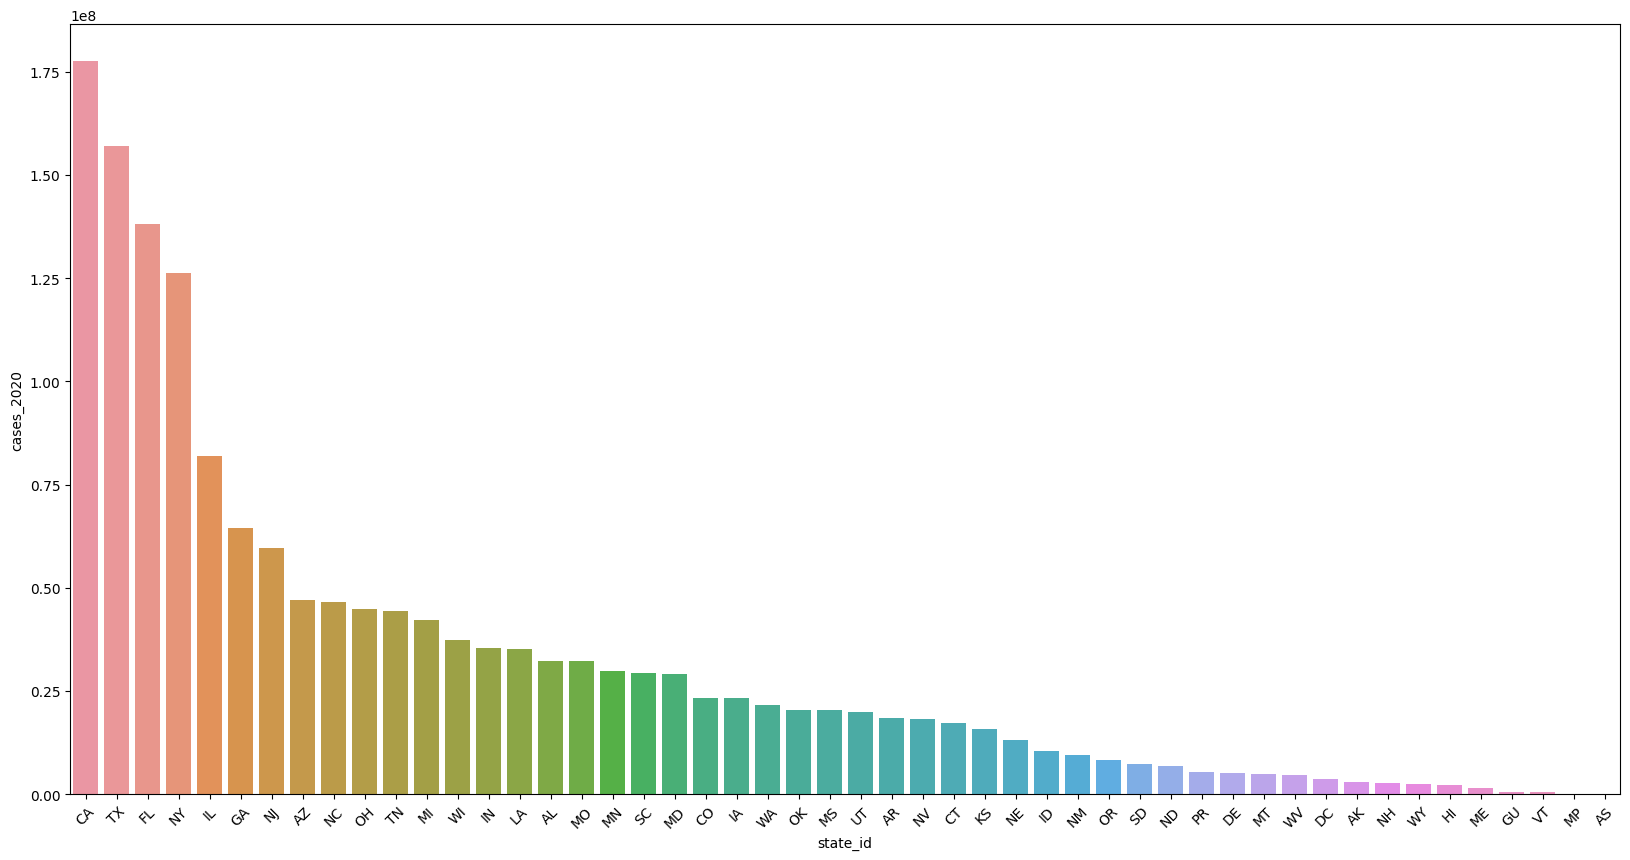

In [256]:
state_cases = state_cases.groupby('state_id', axis=0).sum()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
#cases_2020 group by state_id and sort by cases_2020
state_cases = state_cases.sort_values(by='cases_2020', ascending=False)
#barplot to show the cases_2020 across the states group by state_id
sns.barplot(x=state_cases.index, y=state_cases['cases_2020'])
plt.xticks(rotation=45)
plt.show()

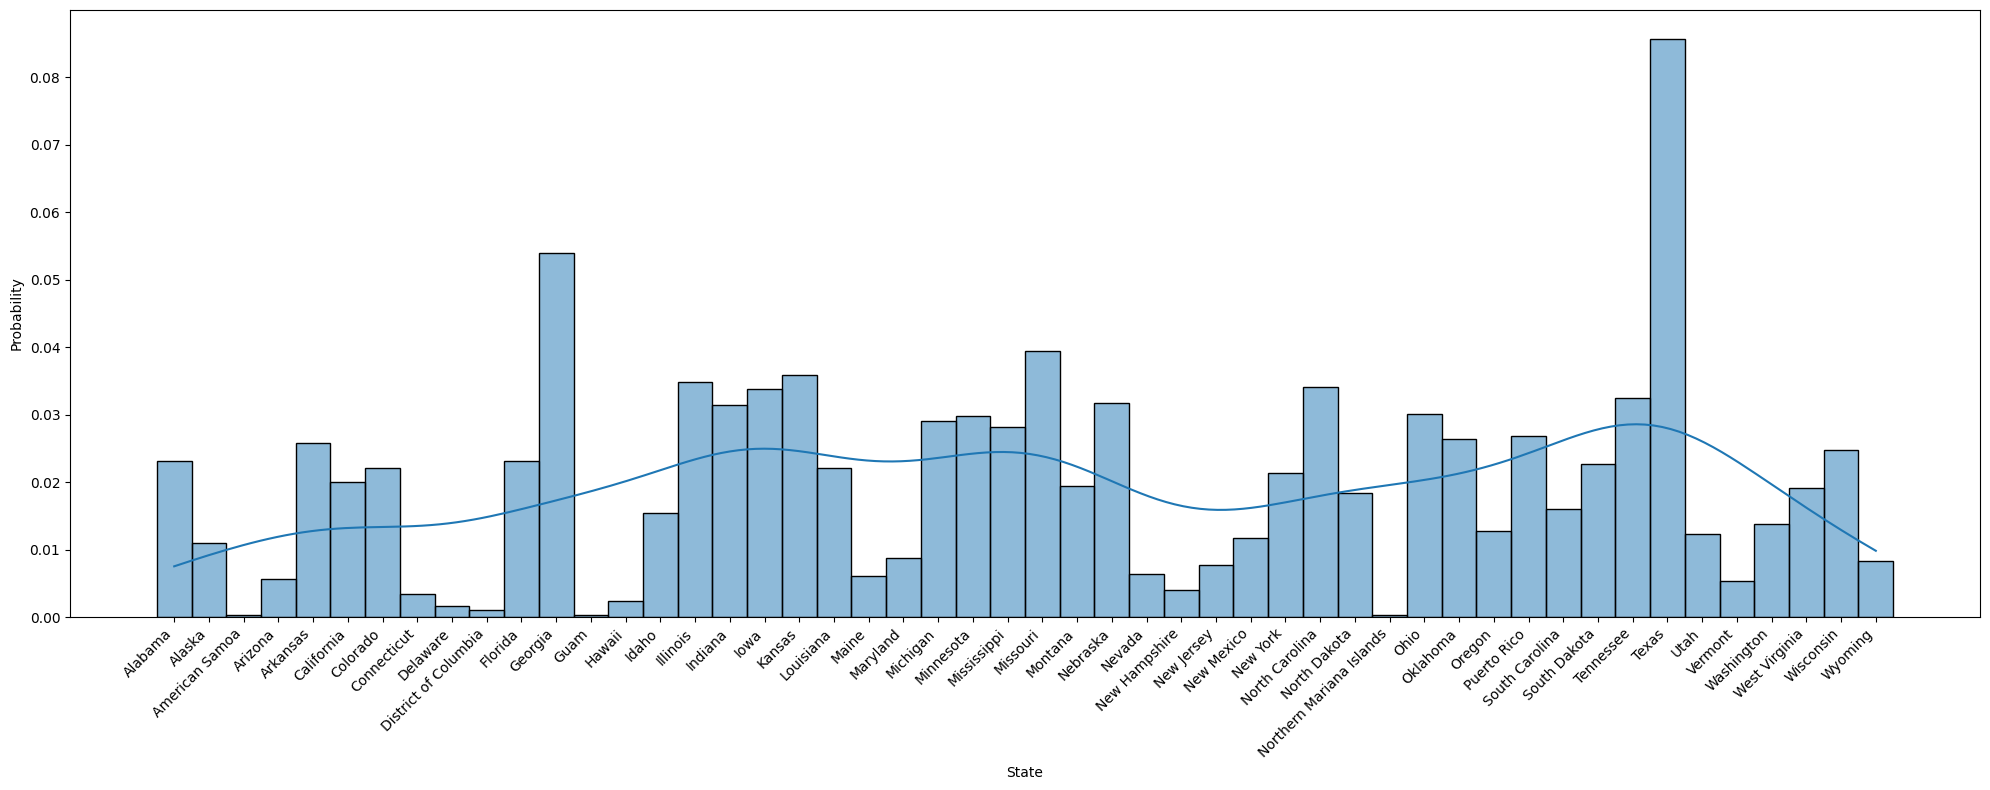

In [257]:
'''Density Plot for States with total confirmed cases spread among US states.'''

plt.figure(figsize=(20, 8))
sns.histplot(data=confirmed_us_cases, x="State",stat='probability', kde=True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [258]:
#Extract the desired columns from the result dataframe
global_df=result[['Continent','Country','2020','2021','2022']]

#Melt the dataframe so that each row represents one year
global_df = pd.melt(global_df, id_vars = ['Continent','Country'])

#Rename the columns to more meaningful names
global_df.rename(columns={'variable': "Year"}, inplace=True)
global_df.rename(columns={'value': "Cases"}, inplace=True)

#Convert the Year column to datetime format and then extract the year from it
global_df['Year'] = pd.to_datetime(global_df['Year'], format='%Y', errors='ignore')
global_df['Year'] = global_df['Year'].dt.year

#Show the resulting dataframe
global_df.head()

,Continent,Country,Year,Cases
0,Asia,Afghanistan,2020,8501751
1,Europe,Albania,2020,3727544
2,Africa,Algeria,2020,10583375
3,Africa,Angola,2020,1343410
4,Americas,Argentina,2020,148336421


<Axes: xlabel='Continent', ylabel='Count'>

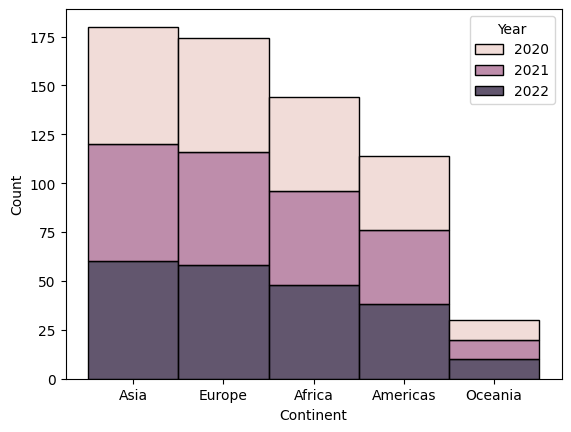

In [259]:
sns.histplot(data=global_df, x="Continent",hue='Year',multiple="stack")

In [260]:
df_amer=global_df[custom_df['Continent'] == 'Americas']
df_asia=global_df[custom_df['Continent'] == 'Asia']
df_africa=global_df[custom_df['Continent'] == 'Africa']
df_oceania=global_df[custom_df['Continent'] == 'Oceania']
df_asia.head()

,Continent,Country,Year,Cases
0,Asia,Afghanistan,2020,8501751
14,Asia,Bahrain,2020,12929706
15,Asia,Bangladesh,2020,68809478
25,Asia,Cambodia,2020,63394
46,Asia,China,2020,328142




### Box Plot 



<Axes: xlabel='Cases', ylabel='Country'>

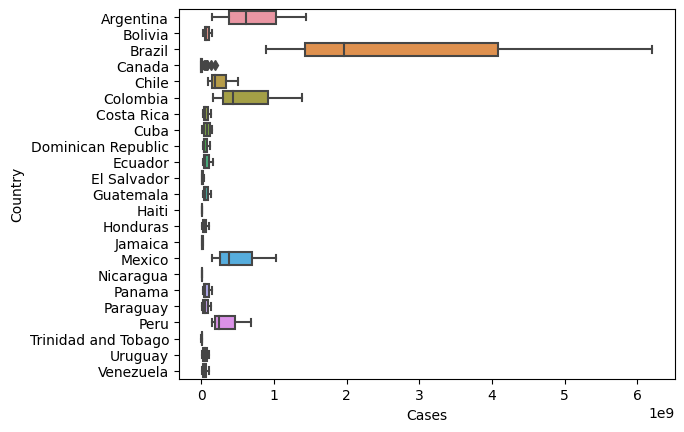

In [261]:
sns.boxplot(x="Cases", y="Country", data=df_amer)

In [262]:
global_df.head()

,Continent,Country,Year,Cases
0,Asia,Afghanistan,2020,8501751
1,Europe,Albania,2020,3727544
2,Africa,Algeria,2020,10583375
3,Africa,Angola,2020,1343410
4,Americas,Argentina,2020,148336421


<Axes: xlabel='Cases', ylabel='Country'>

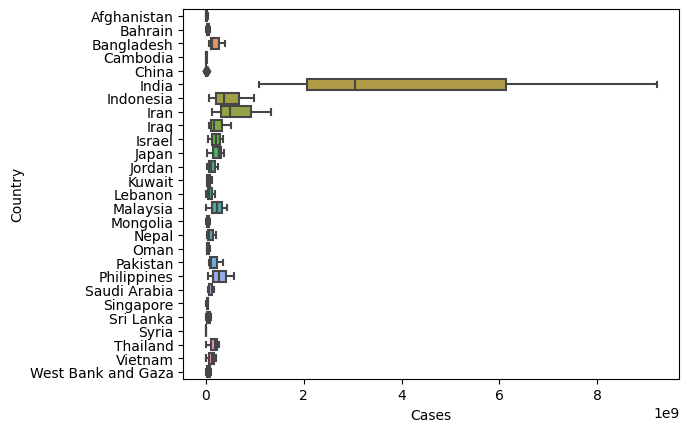

In [263]:
sns.boxplot(x="Cases", y="Country", data=df_asia)



### Violin Plot 



<Axes: xlabel='Year'>

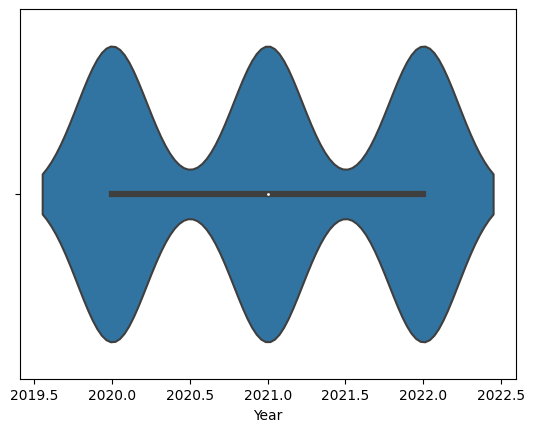

In [264]:
'''Violin Plot Shows Spread of Covid cases over three years.'''
local_df = global_df
sns.violinplot(x=local_df['Year'])

#  Interactive Visualization

## Data Preparation
### Load the data

In [265]:
'''Load Data of Confirmed Cases of COVID in USA with State wise detail'''
#Data Loading from CSV dataset file.
usa_df = pd.read_csv('time_series_covid19_confirmed_US.csv')

'''Drop unwanted columns and Convert Column for visualization'''

usa_df = usa_df.drop(['UID','iso2','iso3','code3','FIPS'], axis=1)
usa_df.head()

date_columns = [pd.to_datetime(col).strftime("%Y") for col in usa_df.columns[6:]]
usa_df.columns = [col for col in usa_df.columns[:6]] + date_columns
#print(confirmed_df.columns)

'''### Aggregate Column to summarize yearwise data'''
usa_df_cases = usa_df.groupby(confirmed_df.columns, axis=1).sum()

'''
Rename Columns to Logical Names
'''
usa_df_cases.rename(columns={'Country_Region': "Country"}, inplace=True)
usa_df_cases.rename(columns={'Province_State': "State"}, inplace=True)
usa_df_cases.rename(columns={'Long_': "Long"}, inplace=True)
usa_df_cases.rename(columns={'Admin2': "County"}, inplace=True)

usa_df_cases = usa_df_cases[['Country','State','County','Lat','Long','2020','2021','2022']]




### Tabular Visualization

In [266]:
'''USA Wide Covid Data'''
usa_df_cases.head()

,Country,State,County,Lat,Long,2020,2021,2022
0,US,Alabama,Autauga,32.539527,-86.644082,371932,2871865,1788169
1,US,Alabama,Baldwin,30.727750,-87.722071,1131152,9750561,6389218
2,US,Alabama,Barbour,31.868263,-85.387129,175724,983751,639336
3,US,Alabama,Bibb,32.996421,-87.125115,148855,1144503,738167
4,US,Alabama,Blount,33.982109,-86.567906,353620,2851434,1719781


In [267]:
'''State wise data'''
usa_state_df = usa_df_cases.groupby('State').agg({'2020':'sum',
                                '2021':'sum',
                                '2022':'sum',
                         'Lat':'mean', 
                         'Long':'mean'})
usa_state_df

,2020,2021,2022,Lat,Long
State,,,,,
Alabama,32296555,227778353,148170466,31.931113,-84.196785
Alaska,2875733,32190676,27471472,56.628273,-139.571540
American Samoa,0,573,202785,-14.271000,-170.132000
Arizona,47071365,350377313,228554796,29.714033,-98.349911
Arkansas,18399133,144787447,95061984,34.005087,-90.033096
California,177625580,1508607744,1030051046,36.582496,-116.704308
Colorado,23326728,212201692,153997596,37.755612,-102.289687
Connecticut,17213148,126903669,85318725,33.290944,-58.125464
Delaware,5154017,41525481,30053485,23.465566,-45.319942


In [268]:
nj_df = usa_df_cases[usa_df_cases['State'] == 'New Jersey']

### Tabular Visualization_df.head()

epic = nj_df[usa_df_cases['2020'] == nj_df['2020'].max()]
epic.head()

/var/folders/2w/ldkytfnd6wj_w7nlpj96g0g80000gn/T/ipykernel_17217/1629881883.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Country,State,County,Lat,Long,2020,2021,2022
1845,US,New Jersey,Bergen,40.960109,-74.071643,6516390,37307515,25992930



### Map Visualization

In [269]:
from folium import plugins
# define the world map centered around MSU with a high zoom level
nj_map = folium.Map(location=[40, -74.01], zoom_start=8.5)
# create a marker cluster
nj = plugins.MarkerCluster().add_to(nj_map)
for lat, lng, label in zip (nj_df['Lat'],nj_df['Long'],nj_df['County']):
    folium.Marker (
        location=[lat, lng],
        icon = None,
        popup = label,
        ).add_to(nj)  
# disply map
nj_map

In [270]:
'''
fig = px.scatter_geo(usa_df_cases, locations="State", color="County",
                     hover_name="County", 
                     animation_frame="2020",
                     projection="hammer")
fig.show()
'''

fig = go.Figure(data=go.Scattergeo(
        lon = usa_df_cases['Long'],
        lat = usa_df_cases['Lat'],
        text = usa_df_cases['State'],
        mode = 'markers',
        marker_color = usa_df_cases['2020'],
        ))

fig.update_layout(
        title = 'Covid Cases Surges<br>(Hover over state names)',
        geo_scope='usa',
    )
fig.show()

In [272]:
df = usa_df_cases
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['Long'],
        lat = df['Lat'],
        text = df['State'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Reds',
            cmin = 0,
            color = df['2020'],
            cmax = df['2020'].max(),
            colorbar_title="Covid Surge<br>United States"
        )))

fig.update_layout(
        title = 'Covid Cases<br>(Hover for State Name)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [274]:
top_5_states = usa_df_cases.nlargest(5, '2020')
top_5_states

,Country,State,County,Lat,Long,2020,2021,2022
215,US,California,Los Angeles,34.308284,-118.228241,59988347,477357350,321697191
642,US,Illinois,Cook,41.841448,-87.816588,39396898,205850280,131408821
2800,US,Texas,Harris,29.858649,-95.393395,33779711,186794597,116951262
384,US,Florida,Miami-Dade,25.611236,-80.551706,33034677,196714630,137472844
110,US,Arizona,Maricopa,33.348359,-112.491815,30081416,220057630,144432379


In [275]:
import pandas as pd
import plotly.express as px
# Replace 'Continent' and 'Cases' with the column names in your dataframe

fig = px.pie(top_5_states, values='2020', names='State', title='Top 5 states COVID-19 Cases in USA', hover_data=['State'])
fig.show()


In [276]:
state_df1 = usa_state_df.reset_index()
#print(state_df1.columns)

state_df1=state_df1[['State','2020','2021','2022']]


state_df = pd.melt(state_df1, id_vars = ['State'])

state_df.rename(columns={'variable': "Year"}, inplace=True)
state_df.rename(columns={'value': "Cases"}, inplace=True)

state_df.head()


,State,Year,Cases
0,Alabama,2020,32296555
1,Alaska,2020,2875733
2,American Samoa,2020,0
3,Arizona,2020,47071365
4,Arkansas,2020,18399133


In [277]:
import plotly.express as px

state_df1 = usa_state_df.reset_index()
state_df1 = state_df1[['State', '2020', '2021', '2022']]

state_df = pd.melt(state_df1, id_vars=['State'])
state_df.rename(columns={'variable': "Year", 'value': "Cases"}, inplace=True)

fig = px.bar(state_df, x="State", y="Cases", color="Year", title="COVID-19 Cases by State",
             animation_frame="Year", range_y=[0, state_df['Cases'].max()])

fig.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_title="State", yaxis_title="Cases")

fig.show()


In [280]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html

# Create the Dash app
app = dash.Dash(__name__)

# Define the state_df1 DataFrame
state_df1 = usa_state_df.reset_index()
state_df1 = state_df1[['State', '2020', '2021', '2022']]

# Create the dropdown options
dropdown_options = [{'label': year, 'value': year} for year in state_df1.columns[1:]]

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='year-dropdown',
        options=dropdown_options,
        value='2020',
        clearable=False
    ),
    dcc.Graph(
        id='bar-chart'
    )
])

# Define the callback function to update the bar chart based on the dropdown selection
@app.callback(
    dash.dependencies.Output('bar-chart', 'figure'),
    [dash.dependencies.Input('year-dropdown', 'value')]
)
def update_bar_chart(selected_year):
    # Filter the DataFrame based on the selected year
    filtered_df = state_df1[['State', selected_year]]
    filtered_df.rename(columns={selected_year: 'Cases'}, inplace=True)
    
    # Create the bar chart
    fig = px.bar(filtered_df, x="State", y="Cases", color_discrete_sequence=['#1f77b4'])
    fig.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_title="State", yaxis_title="Cases")
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server()



Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


/var/folders/2w/ldkytfnd6wj_w7nlpj96g0g80000gn/T/ipykernel_17217/1647582453.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2w/ldkytfnd6wj_w7nlpj96g0g80000gn/T/ipykernel_17217/1647582453.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2w/ldkytfnd6wj_w7nlpj96g0g80000gn/T/ipykernel_17217/1647582453.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2w/ldkytfnd6wj_w7nlpj96g0g80000gn/T/ipy

In [283]:
import plotly.express as px

state_df1 = usa_state_df.reset_index()
state_df1 = state_df1[['State', '2020', '2021', '2022']]

state_df = pd.melt(state_df1, id_vars=['State'])
state_df.rename(columns={'variable': "Year", 'value': "Cases"}, inplace=True)

fig = px.bar(state_df, x="State", y="Cases", color="Year", title="COVID-19 Cases by State",
             animation_frame="Year", range_y=[0, state_df['Cases'].max()])

fig.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_title="State", yaxis_title="Cases")

fig.update_layout(
    updatemenus=[dict(
        buttons=list([
            dict(
                args=[{"frame": {"duration": 500, "redraw": True},
                       "fromcurrent": True, "transition": {"duration": 0}}],
                label="2020",
                method="animate"
            ),
            dict(
                args=[{"frame": {"duration": 500, "redraw": True},
                       "fromcurrent": True, "transition": {"duration": 0}}],
                label="2021",
                method="animate"
            ),
            dict(
                args=[{"frame": {"duration": 500, "redraw": True},
                       "fromcurrent": True, "transition": {"duration": 0}}],
                label="2022",
                method="animate"
            ),
        ]),
        direction="left",
        showactive=True,
        type="buttons",
        x=0.1,
        y=1.1,
        xanchor="left",
        yanchor="top"
    )],
    annotations=[dict(text="Year:", x=0, y=1.08, yref="paper", align="left", showarrow=False)],
)

fig.show()

# THE END
# THANK YOU FOR YOUR TIME